<a href="https://colab.research.google.com/github/Harshita1036/Task-6/blob/main/Task_6_Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name : Harshita Gahlot**

# **Task 6: Prediction using Decision Tree Algorithm**

## **Create the Decision Tree classifier and visualize it graphically.**

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import graphviz
import pydotplus

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image 

In [33]:
df = pd.read_csv('Iris.csv')

In [34]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df.drop(['Id'],axis = 1, inplace = True)

In [36]:
df.shape

(150, 5)

In [37]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## **Data Visualisation**

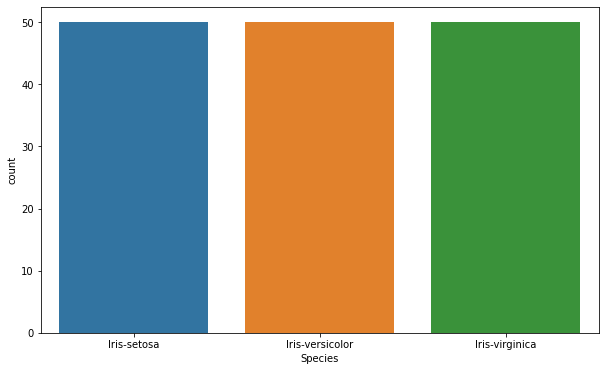

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='Species',data=df)

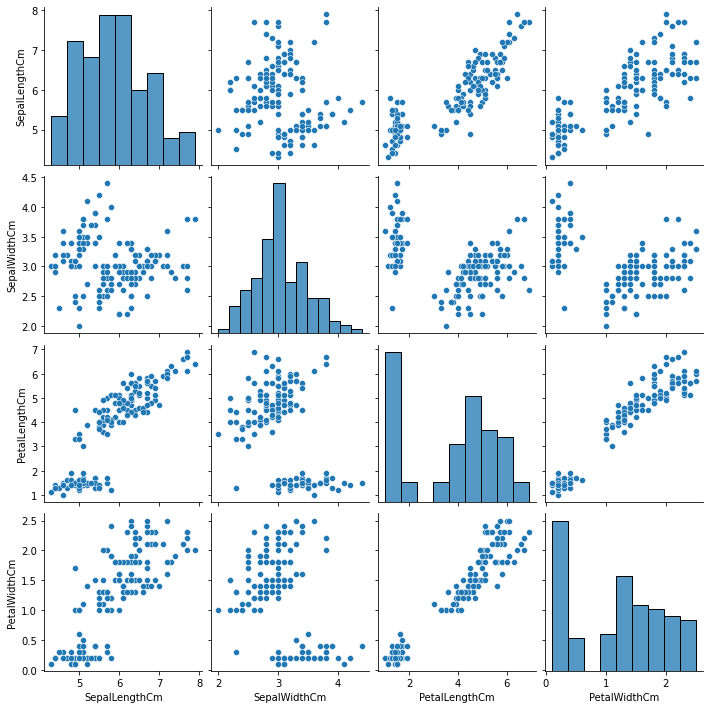

In [39]:
sns.pairplot(data=df)

In [40]:
#Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['Species']= label_encoder.fit_transform(df['Species']) 
df['Species'].unique()

array([0, 1, 2])

## **Training and Testing Set**

In [41]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
feature_col = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']

X = df[feature_col]
y = df.Species

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

### **Checking accuracy**

In [45]:
print("Accuracy", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.9555555555555556


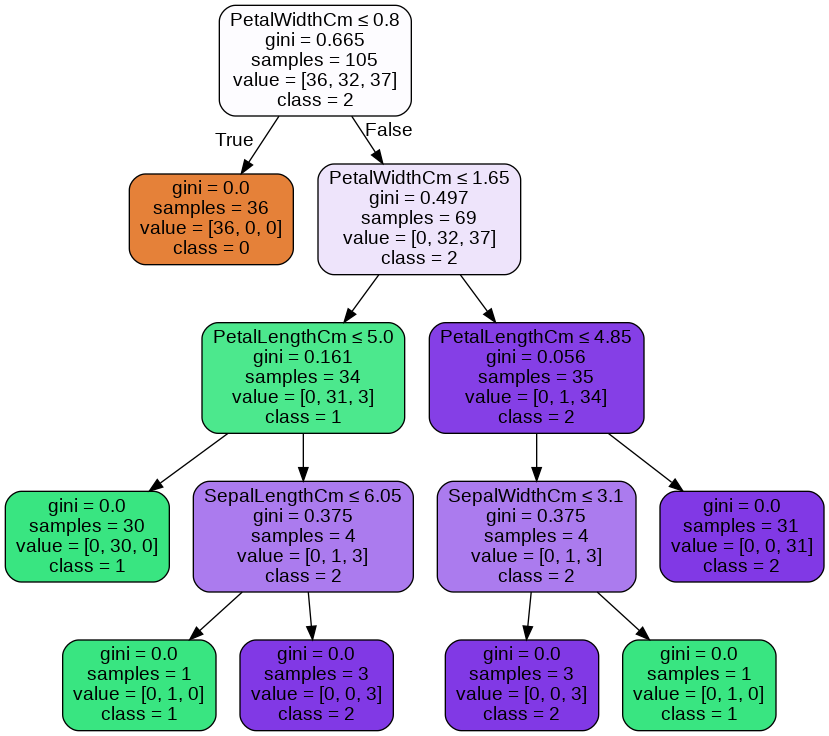

In [46]:
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_col,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Iris_Decision_tree.png')
Image(graph.create_png())

## **Prediction**

In [31]:
print("Enter 4 features: ")
arr = []
for i in range(4):
  x = float(input())
  arr.append(x)
new_arr = [arr]
new_arr = np.array(new_arr)

ans = dtc.predict(new_arr)

dict = { 0 : 'Iris-setosa',
         1 : 'Iris-versicolor',
         2 : 'Iris-virginica'}

print("Flower belongs to the class", dict[ans[0]])

Enter 4 features: 
4.9
3.0
1.4
0.2
Flower belongs to the class Iris-setosa
